In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

#### Load an example image

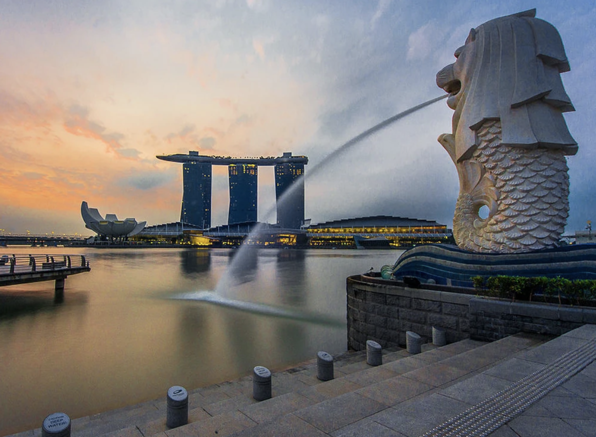

In [2]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
caption = "a large fountain spewing water into the air"

display(raw_image.resize((596, 437)))

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
text_input = txt_processors["eval"](caption)
sample = {"image": image, "text_input": [text_input]}

#### Multimodal features

In [5]:
features_multimodal = model.extract_features(sample)
print(features_multimodal.multimodal_embeds.shape)
# # torch.Size([1, 12, 768]), use features_multimodal[:,0,:] for multimodal classification tasks

torch.Size([1, 12, 768])


#### Unimodal features

In [6]:
features_image = model.extract_features(sample, mode="image")
features_text = model.extract_features(sample, mode="text")
print(features_image.image_embeds.shape)
# torch.Size([1, 197, 768])
print(features_text.text_embeds.shape)
# torch.Size([1, 12, 768])

torch.Size([1, 197, 768])
torch.Size([1, 12, 768])


#### Normalized low-dimensional unimodal features

In [7]:
# low-dimensional projected features
print(features_image.image_embeds_proj.shape)
# torch.Size([1, 197, 256])
print(features_text.text_embeds_proj.shape)
# torch.Size([1, 12, 256])
similarity = features_image.image_embeds_proj[:,0,:] @ features_text.text_embeds_proj[:,0,:].t()
print(similarity)
# tensor([[0.2622]])

torch.Size([1, 197, 256])
torch.Size([1, 12, 256])
tensor([[0.2622]], device='cuda:0')
